## JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
# all imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [2]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [3]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [4]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [5]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [6]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
# JSON exercise starts here

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

# Question 1
**Find the 10 countries with most projects**

In [7]:
# import the json data file
df = pd.read_json("data/world_bank_projects.json")

# see the head of the file
df.head(2)

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}


In [8]:
# see the general characteristics of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
sector                      500 non-null object
supplementprojectflg        498 non-null object
projectfinancialtype        500 non-null object
prodline                    500 non-null object
mjtheme                     491 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
project_name                500 non-null object
mjthemecode                 500 non-null object
closingdate                 370 non-null object
totalcommamt                500 non-null int64
id                          500 non-null object
mjsector_namecode           500 non-null object
docty                       446 non-null object
sector1                     500 non-null object
lendinginstr                495 non-null object
countrycode                 500 non-null object
sector2                     380 non-null object
totalamt                    500 n

------
For the first question, it looks like we can go from `project_name` and `countryname` columns of `df`.

In [9]:
# create a new dataframe, so we can apply value_counts()
# you can do without creating a new df. But this is clear.
q1 = df.loc[:,['project_name', 'countryname']]
q1.head(2)

,project_name,countryname
0,Ethiopia General Education Quality Improvement...,Federal Democratic Republic of Ethiopia
1,TN: DTF Social Protection Reforms Support,Republic of Tunisia


In [10]:
# apparently there are no missing values.
q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
project_name    500 non-null object
countryname     500 non-null object
dtypes: object(2)
memory usage: 7.9+ KB


------------------
Let's do a chain function.

- First, get the `.value_counts()` of `countryname` column of `q1` dataframe.
- Then, chain `.head(10)` to see top 10 countries with highest number of projects.

In [11]:
top10_country = q1['countryname'].value_counts().head(10)
top10_country

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
Nepal                              12
People's Republic of Bangladesh    12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

Text(0.5, 0, 'Number of Projects')

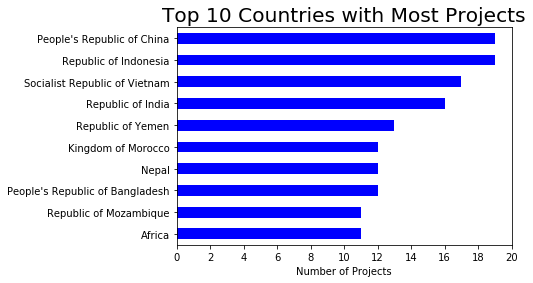

In [12]:
top10_country.iloc[::-1].plot(kind='barh', xticks=(np.arange(0,21,2)), color='blue')
plt.style.use('fivethirtyeight')
plt.title('Top 10 Countries with Most Projects')
plt.xlabel('Number of Projects')

---
---

# Question 2

**Find the top 10 major project themes (using column `'mjtheme_namecode'`)**

In [13]:
df.mjtheme_namecode.head(5)

0    [{'code': '8', 'name': 'Human development'}, {...
1    [{'code': '1', 'name': 'Economic management'},...
2    [{'code': '5', 'name': 'Trade and integration'...
3    [{'code': '7', 'name': 'Social dev/gender/incl...
4    [{'code': '5', 'name': 'Trade and integration'...
Name: mjtheme_namecode, dtype: object

It looks like each observation might have multiple dictionaries just like a __JSON file__. Let's examine a unique observation to see. We can use **`.json_normalize()`** function.

In [14]:
# read the the dataframe using json_load
json = json.load((open('data/world_bank_projects.json')))

# normalize the column that we will be using. 
theme = json_normalize(json, 'mjtheme_namecode')
theme.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


Looks like there are some missing values. Let's create a *dictionary* where __key__ is code for theme, and __value__ is the name of that associated code.

In [15]:
# create an empty list
themes_dict = {}

# iterate through rows in dataframe
for index, row in theme.iterrows():
    # pass if the name column is empty
    if row['name'] != '':
        if row.code not in themes_dict:
            themes_dict[row['code']] = row['name']

# now we have the themes matched with its associated code.
themes_dict

{'8': 'Human development',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '11': 'Environment and natural resources management',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

In [16]:
major_themes = theme.code.value_counts().head(10)
major_themes

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
Name: code, dtype: int64

Text(0.5, 0, 'Number of Project Themes')

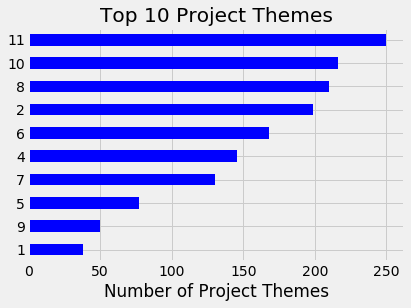

In [17]:
# plot these in horizontal bar
major_themes.iloc[::-1].plot(kind='barh', xticks=(np.arange(0,260,50)), color='blue')
plt.style.use('fivethirtyeight')
plt.title('Top 10 Project Themes')
plt.xlabel('Number of Project Themes')

What if we want to plot using theme names instead of theme codes? That is my approach. I am pretty sure there are plenty available.

In [18]:
# convert the Pandas Series into Pandas DataFrame
major_themes_df = pd.DataFrame(major_themes).reset_index()
major_themes_df.columns = ('theme_code', 'count_of_themes')
major_themes_df

,theme_code,count_of_themes
0,11,250
1,10,216
2,8,210
3,2,199
4,6,168
5,4,146
6,7,130
7,5,77
8,9,50
9,1,38


In [19]:
# create a new column using map
major_themes_df['theme_name'] = major_themes_df['theme_code'].map(themes_dict)
major_themes_df

,theme_code,count_of_themes,theme_name
0,11,250,Environment and natural resources management
1,10,216,Rural development
2,8,210,Human development
3,2,199,Public sector governance
4,6,168,Social protection and risk management
5,4,146,Financial and private sector development
6,7,130,Social dev/gender/inclusion
7,5,77,Trade and integration
8,9,50,Urban development
9,1,38,Economic management


Text(0, 0.5, '')

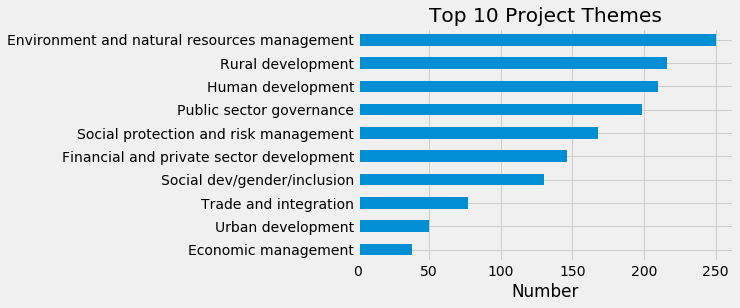

In [20]:
# plot these in horizontal bar from highest to lowest
major_themes_df[::-1].plot(y= 'count_of_themes', x='theme_name', kind='barh', legend=False)

plt.style.use('fivethirtyeight')
plt.title('Top 10 Project Themes')
plt.xlabel('Number')
plt.ylabel('')

---
---

# Question 3
**In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.**

In [21]:
# as you can see there are some missing value.
theme.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [22]:
# create a function to apply to 'mjtheme_namecode' column to fill missing values
def fill_missing(dict_list):
    
    # create an empty list, after we filled
    # we will append this for each row
    filled_list = []
    
    # iterate each row. Remember each row is a list of dictionaries in `mjtheme_namecode`
    for item in dict_list:
        # if it is empty fill it before appending
        if item['name'] == '':
            item['name'] = themes_dict[item['code']]
        
        # append it whether it is filled or already filled
        filled_list.append(item)
    # return item list. It is a list of dictionaries just as original df
    return filled_list

In [23]:
# confirm that there are missing values
print(df['mjtheme_namecode'][0])

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]


In [24]:
# apply the function to 'mjtheme_namecode' column and assign it to
# a new column - 'themes_filled'
#old_column = df.mjtheme_namecode.copy()
df.mjtheme_namecode.apply(fill_missing)

0      [{'code': '8', 'name': 'Human development'}, {...
1      [{'code': '1', 'name': 'Economic management'},...
2      [{'code': '5', 'name': 'Trade and integration'...
3      [{'code': '7', 'name': 'Social dev/gender/incl...
4      [{'code': '5', 'name': 'Trade and integration'...
                             ...                        
495    [{'code': '4', 'name': 'Financial and private ...
496    [{'code': '8', 'name': 'Human development'}, {...
497    [{'code': '10', 'name': 'Rural development'}, ...
498    [{'code': '10', 'name': 'Rural development'}, ...
499    [{'code': '9', 'name': 'Urban development'}, {...
Name: mjtheme_namecode, Length: 500, dtype: object

In [25]:
print("Now, it is filled with necessary theme names: ")
print(df['mjtheme_namecode'][0])

Now, it is filled with necessary theme names: 
[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': 'Environment and natural resources management'}]


In [31]:
df.head(2)

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
